<h1>IBM Professional Certificate Capstone Project

<h3>This notebook will be used for the Coursera Capstone Project
<h4>We will use data regarding car accidents in Canada to create a model that can predict the severity of an accident

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<h4>Importing the CSV

In [51]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
COL0 = pd.read_csv('Collisions.csv')
COL0.head()


C:\Users\Rotortex-Produccion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h4>Want to know the size of the table

In [4]:
COL0.shape

(194673, 38)

In [5]:
Roadcond = pd.DataFrame(COL0['ROADCOND'])

<h4>Counting the number of empty cells in column roadcond

In [6]:
Roadcond.isnull().sum()

ROADCOND    5012
dtype: int64

<h4>Pulling ROADCOND AND SEVERITYCODE columns to a new DF to analyze.

In [7]:
Roadcond2 = pd.DataFrame(COL0['ROADCOND'],COL0['SEVERITYCODE'])
Roadcond2.head()

,ROADCOND
SEVERITYCODE,
2,Dry
1,Wet
1,Wet
1,Wet
2,Dry


<h4>Counting Road Conditions on ROADCOND column

In [8]:
COL0['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

<h4>Retreiving correlations of the data frame and asking to only see SEVERITYCODE column

In [9]:
COL0.corr()['SEVERITYCODE']

SEVERITYCODE      1.000000
X                 0.010309
Y                 0.017737
OBJECTID          0.020131
INCKEY            0.022065
COLDETKEY         0.022079
INTKEY            0.006553
SEVERITYCODE.1    1.000000
PERSONCOUNT       0.130949
PEDCOUNT          0.246338
PEDCYLCOUNT       0.214218
VEHCOUNT         -0.054686
SDOT_COLCODE      0.188905
SDOTCOLNUM        0.004226
SEGLANEKEY        0.104276
CROSSWALKKEY      0.175093
Name: SEVERITYCODE, dtype: float64

<h4>Find out which columns are STRINGS and cant be counted for correlation

In [10]:
COL0.select_dtypes(['object']).columns

Index(['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

<h4>Looking for NULL or MISSING data on each column

In [11]:
COL0.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

<h4>Removing columns that have too much missing information and those that have a very small correlation with SEVERITYCODE. New DF called COL1.

In [12]:
COL1 = COL0.drop(columns={'ADDRTYPE','VEHCOUNT','ST_COLCODE','SEVERITYDESC','SDOT_COLCODE','INCDTTM','INCDATE','ST_COLDESC','SDOT_COLDESC','LOCATION','STATUS','REPORTNO','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY'})
COL1.head(5)

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Angles,2,0,0,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,N
1,1,-122.347294,47.647172,Sideswipe,2,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,N
2,1,-122.334540,47.607871,Parked Car,4,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,N
3,1,-122.334803,47.604803,Other,3,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,N
4,2,-122.306426,47.545739,Angles,2,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,N


In [13]:
pd.set_option('display.max_columns', None)

<h4> Changing column names

In [14]:
COL1.rename(columns={'X':'Latitude','Y':'Longitude'}, inplace=True)
COL1.head()

,SEVERITYCODE,Latitude,Longitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Angles,2,0,0,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,N
1,1,-122.347294,47.647172,Sideswipe,2,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,N
2,1,-122.334540,47.607871,Parked Car,4,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,N
3,1,-122.334803,47.604803,Other,3,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,N
4,2,-122.306426,47.545739,Angles,2,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,N


In [16]:
COL1.corr()['SEVERITYCODE']

SEVERITYCODE    1.000000
Latitude        0.010309
Longitude       0.017737
PERSONCOUNT     0.130949
PEDCOUNT        0.246338
PEDCYLCOUNT     0.214218
SEGLANEKEY      0.104276
CROSSWALKKEY    0.175093
Name: SEVERITYCODE, dtype: float64

<h4>Counting NaN values

In [17]:
count_nan=len(COL1)-COL1.count()
count_nan

SEVERITYCODE        0
Latitude         5334
Longitude        5334
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
SEGLANEKEY          0
CROSSWALKKEY        0
HITPARKEDCAR        0
dtype: int64

<h4>Removing rows with NaN values

In [18]:
COL2 = COL1.dropna()
count_nan=len(COL2)-COL2.count()
count_nan

SEVERITYCODE     0
Latitude         0
Longitude        0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SEGLANEKEY       0
CROSSWALKKEY     0
HITPARKEDCAR     0
dtype: int64

<h4>Replacing data in HITPARKEDCAR with 1s and 0s

In [19]:
b2 = COL2['HITPARKEDCAR'].value_counts()
b2

N    174386
Y      5681
Name: HITPARKEDCAR, dtype: int64

In [20]:
COL2['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
COL2.head()

C:\Users\Rotortex-Produccion\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SEVERITYCODE,Latitude,Longitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Angles,2,0,0,At Intersection (intersection related),N,Overcast,Wet,Daylight,0,0,0
1,1,-122.347294,47.647172,Sideswipe,2,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0
2,1,-122.334540,47.607871,Parked Car,4,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0
3,1,-122.334803,47.604803,Other,3,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,0,0,0
4,2,-122.306426,47.545739,Angles,2,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0


<h4> Replacing UNIDERINF values for 1s and 0s using replace

In [21]:
COL2['UNDERINFL'].replace(to_replace=['N','Y','0','1'], value=[0,1,0,1],inplace=True)
COL2.head()

C:\Users\Rotortex-Produccion\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SEVERITYCODE,Latitude,Longitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Angles,2,0,0,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,0,0
1,1,-122.347294,47.647172,Sideswipe,2,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0
2,1,-122.334540,47.607871,Parked Car,4,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0
3,1,-122.334803,47.604803,Other,3,0,0,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,0,0
4,2,-122.306426,47.545739,Angles,2,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0


<h4> Using lambda function to rename and join columns to clean the data. Then, using dummys and concatenate to change COLLISIONTYPE to columns with 1s and 0s, and finally, drop column COLLISIONTYPE 

In [22]:
cl2 = COL2
cl2['COLLISIONTYPE'].value_counts()

Parked Car    42886
Angles        34353
Rear Ended    32778
Other         21907
Sideswipe     17862
Left Turn     13586
Pedestrian     6481
Cycles         5334
Right Turn     2901
Head On        1979
Name: COLLISIONTYPE, dtype: int64

In [23]:
def renaming(data):
    if data == 'Head On' or data =='Right Turn':
        return 'Other'
    elif data =='Cycles' or data =='Pedestrian':
        return 'Pedestrian/Cycles'
    else:
        return data

cl2['COLLISIONTYPE'] = cl2.apply(lambda cl2 : renaming(cl2['COLLISIONTYPE']),axis=1)
cl2['COLLISIONTYPE'].value_counts()

<ipython-input-23-7202042231c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl2['COLLISIONTYPE'] = cl2.apply(lambda cl2 : renaming(cl2['COLLISIONTYPE']),axis=1)


Parked Car           42886
Angles               34353
Rear Ended           32778
Other                26787
Sideswipe            17862
Left Turn            13586
Pedestrian/Cycles    11815
Name: COLLISIONTYPE, dtype: int64

In [24]:
cl2 = pd.concat([COL2,pd.get_dummies(COL2['COLLISIONTYPE'])], axis=1)
cl2.drop(['COLLISIONTYPE'], axis = 1,inplace=True)
cl2.head()

,SEVERITYCODE,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe
0,2,-122.323148,47.703140,2,0,0,At Intersection (intersection related),0,Overcast,Wet,Daylight,0,0,0,1,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,3,0,0,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,0,0,0,1,0,0,0,0,0,0


<h4> Using the same code, we clean JUNCTIONTYPE, turn it into 1s and 0s with dummys, concatenate the new columns, and finally, drop JUNCTIONTYPE 

In [25]:
cl3 = cl2
cl3['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              84513
At Intersection (intersection related)               60915
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [26]:
def renaming(data):
    if data == 'Unknown' or data =='Ramp Junction' or data =='At Intersection (but not related to intersection)' or data =='Driveway Junction':
        return 'Other'
    else:
        return data

cl3['JUNCTIONTYPE'] = cl3.apply(lambda cl3 : renaming(cl3['JUNCTIONTYPE']),axis=1)
cl3['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    84513
At Intersection (intersection related)     60915
Mid-Block (but intersection related)       22035
Other                                      12604
Name: JUNCTIONTYPE, dtype: int64

In [27]:
cl3 = pd.concat([cl2,pd.get_dummies(cl2['JUNCTIONTYPE'])], axis=1)
cl3.drop(['JUNCTIONTYPE'], axis = 1,inplace=True)
cl3.head()

,SEVERITYCODE,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other
0,2,-122.323148,47.703140,2,0,0,0,Overcast,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,2,0,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,-122.334540,47.607871,4,0,0,0,Overcast,Dry,Daylight,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,0,0,0,Clear,Dry,Daylight,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,0,0,0,Raining,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0


<h4> Using the same code, we clean WEATHER, turn it into 1s and 0s with dummys, concatenate the new columns, and finally, drop WEATHER column

In [28]:
cl3['WEATHER'].value_counts()

Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [29]:
def renaming(data):
    if data == 'Fog/Smog/Smoke' or data =='Blowing Sand/Dirt' or data =='Severe Crosswind' or data =='Partly Cloudy' or data =='Sleet/Hail/Freezing Rain' or data=='Snowing' or data=='Unknown':
        return 'Other'
    else:
        return data

cl3['WEATHER'] = cl3.apply(lambda cl3 : renaming(cl3['WEATHER']),axis=1)
cl3['WEATHER'].value_counts()

Clear       107692
Raining      31719
Overcast     26809
Other        13847
Name: WEATHER, dtype: int64

In [30]:
cl4 = cl3
cl4 = pd.concat([cl3,pd.get_dummies(cl3['WEATHER'])], axis=1)
cl4.drop(['WEATHER'], axis = 1,inplace=True)
cl4.head()

,SEVERITYCODE,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other,Clear,Other,Overcast,Raining
0,2,-122.323148,47.703140,2,0,0,0,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,2,0,0,0,Wet,Dark - Street Lights On,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,0,Dry,Daylight,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,1,-122.334803,47.604803,3,0,0,0,Dry,Daylight,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,2,-122.306426,47.545739,2,0,0,0,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


<h4> Using the same code, we clean ROADCOND, turn it into 1s and 0s with dummys, concatenate the new columns, and finally, drop ROADCOND column

In [31]:
cl5 = cl4
cl5['ROADCOND'].value_counts()

Dry               120629
Wet                45597
Unknown            11384
Ice                 1161
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

In [32]:
def renaming(data):
    if data == 'Oil' or data =='Sand/Mud/Dirt' or data =='Standing Water' or data =='Snow/Slush' or data =='Ice':
        return 'Other'
    else:
        return data

cl5['ROADCOND'] = cl5.apply(lambda cl5 : renaming(cl5['ROADCOND']),axis=1)
cl5['ROADCOND'].value_counts()

Dry        120629
Wet         45597
Unknown     11384
Other        2457
Name: ROADCOND, dtype: int64

In [33]:
cl5 = pd.concat([cl4,pd.get_dummies(cl4['ROADCOND'])], axis=1)
cl5.drop(['ROADCOND'], axis = 1,inplace=True)
cl5.head()

,SEVERITYCODE,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other,Clear,Other,Overcast,Raining,Dry,Other,Unknown,Wet
0,2,-122.323148,47.703140,2,0,0,0,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,-122.347294,47.647172,2,0,0,0,Dark - Street Lights On,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,0,Daylight,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,1,-122.334803,47.604803,3,0,0,0,Daylight,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,2,0,0,0,Daylight,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


<h4> Using the same code, we clean LIGHTCOND, turn it into 1s and 0s with dummys, concatenate the new columns, and finally, drop LIGHTCOND column

In [34]:
cl6 = cl5
cl6['LIGHTCOND'].value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dawn                          2389
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [35]:
def renaming(data):
    if data == 'Dark - Unknown Lighting' or data =='Dark - Street Lights Off' or data =='Dark - No Street Lights' or data =='Dawn' or data =='Dusk':
        return 'Other'
    else:
        return data

cl5['LIGHTCOND'] = cl6.apply(lambda cl6 : renaming(cl6['LIGHTCOND']),axis=1)
cl5['LIGHTCOND'].value_counts()

Daylight                   112216
Dark - Street Lights On     46683
Other                       10828
Unknown                     10340
Name: LIGHTCOND, dtype: int64

In [36]:
cl6 = pd.concat([cl5,pd.get_dummies(cl5['LIGHTCOND'])], axis=1)
cl6.drop(['LIGHTCOND'], axis = 1,inplace=True)
cl6.head()

,SEVERITYCODE,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other,Clear,Other,Overcast,Raining,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,2,-122.323148,47.703140,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,1,-122.347294,47.647172,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,2,-122.306426,47.545739,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


<h4> There are no more string values in the table, so we can now separate SEVERITYCODE from the rest of the table and get ready for normalization.

In [37]:
cl7=cl6.drop(columns={'SEVERITYCODE'})
cl7.head()

,Latitude,Longitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Angles,Left Turn,Other,Parked Car,Pedestrian/Cycles,Rear Ended,Sideswipe,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other,Clear,Other,Overcast,Raining,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,-122.323148,47.703140,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,-122.347294,47.647172,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
2,-122.334540,47.607871,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
3,-122.334803,47.604803,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,-122.306426,47.545739,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


<h3>Normalizing
<h4> Define X and Y for our model

In [38]:
y = cl6['SEVERITYCODE'].values
y[0:5]


array([2, 1, 1, 1, 2], dtype=int64)

<h4> Pre Processing and Fitting the data

In [39]:
X=cl7.values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.24396521,  1.48477487, -0.35018524, -0.19318067, -0.17494156,
        -0.22690556, -0.0830008 , -0.13930458, -0.18049143,  2.05953087,
        -0.28566923, -0.4180414 , -0.55912742, -0.26499443, -0.47174366,
        -0.3318432 ,  1.39858396, -0.37340834, -0.94045349, -0.27434356,
        -1.21982473, -0.2886265 ,  2.39095427, -0.46240114, -1.42460272,
        -0.11761667, -0.25978363,  1.71729366, -0.59159911,  0.77759012,
        -0.25294372, -0.24682253],
       [-0.56150856,  0.49122186, -0.35018524, -0.19318067, -0.17494156,
        -0.22690556, -0.0830008 , -0.13930458, -0.18049143, -0.48554747,
        -0.28566923, -0.4180414 , -0.55912742, -0.26499443, -0.47174366,
         3.01347141, -0.71500891, -0.37340834,  1.0633168 , -0.27434356,
        -1.21982473, -0.2886265 , -0.41824305,  2.16262443, -1.42460272,
        -0.11761667, -0.25978363,  1.71729366,  1.69033386, -1.28602457,
        -0.25294372, -0.24682253],
       [-0.13604278, -0.20645905,  1.11073119, -0.1931

<h4>Splitting the data so we can train our model with 20% of the data, and test it's accuracy with the other 80%.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (144053, 32) (144053,)
Test set: (36014, 32) (36014,)


<h2>K-Neighboors

<h4> Using K-Neighboors with a range of K from 10 to 70, so we can have more data to choose the best K for our model

In [63]:
accuracy_score=[]

for i in range (10,70):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test,pred_i))

accuracy_score

[0.7334647637030044,
 0.7283278724940301,
 0.7343533070472594,
 0.7309657355472872,
 0.7352696173710224,
 0.7332148608874327,
 0.7363525295718332,
 0.7337979674571,
 0.7363247625923252,
 0.7336035986005442,
 0.7357416560226578,
 0.7340756372521797,
 0.7374909757316599,
 0.7367690342644527,
 0.7386294218914866,
 0.7369078691619926,
 0.7372410729160882,
 0.7372688398955961,
 0.7382129171988671,
 0.7381018492808352,
 0.73926806242017,
 0.7394346642972177,
 0.7400733048259011,
 0.7386016549119787,
 0.740156605764425,
 0.7394068973177098,
 0.740128838784917,
 0.7395734991947576,
 0.7399622369078691,
 0.7395179652357416,
 0.7397956350308214,
 0.7399067029488532,
 0.7408785472316322,
 0.740101071805409,
 0.741017382129172,
 0.7405731104570444,
 0.7405731104570444,
 0.7405453434775365,
 0.7410451491086799,
 0.7415449547398234,
 0.7419892264119509,
 0.7414616538012995,
 0.7412395179652358,
 0.7416560226578552,
 0.7412395179652358,
 0.7416282556783473,
 0.7408507802521241,
 0.7406841783750764,
 

<h4> Plotting the accuracy results

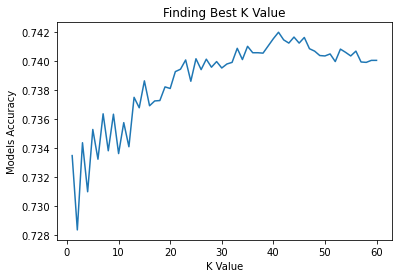

In [100]:
plt.plot(range(1,61), accuracy_score)
    
plt.ylabel('Models Accuracy')
plt.xlabel('K Value')
plt.title('Finding Best K Value')

plt.show()

<h4> Converting the results to a dataframe, naming the columns, and asking for it to show me value of K with the highest accuracy in our model.

In [95]:
asknn=pd.DataFrame(accuracy_score, columns={'Accuracy'})
K=[*range(10,70,1)]
asknn['K']=K
asknn = asknn.sort_values(by=['Accuracy'], ascending=False)
asknn.head(1)

,Accuracy,K
40,0.741989,50


<h4> Our KNN model is most accurate when K=50, with a 74.1989% accuracy.

<h2> Decision Tree

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
accitree = DecisionTreeClassifier(criterion="gini", max_depth = 30)
accitree

DecisionTreeClassifier(max_depth=30)

In [103]:
accitree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=30)

In [104]:
predTree = accitree.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.693341478313989


<h4>Our Decision Tree model has an accuracy of 69.33% when predicting the severity of accidents.

<h2>Support Vector Machine

In [106]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [107]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [113]:
print("Support Vector Accuracy: ", metrics.accuracy_score(y_test,yhat))

Support Vector Accuracy:  0.7444049536291443


<h4>Support Vector Machine has an accuracy of 74.44% when predicting severity of accidents. This makes it the most effective model tested in this study.